In [1]:
#impport important libraries
import pandas as pd
import matplotlib.pyplot as plt


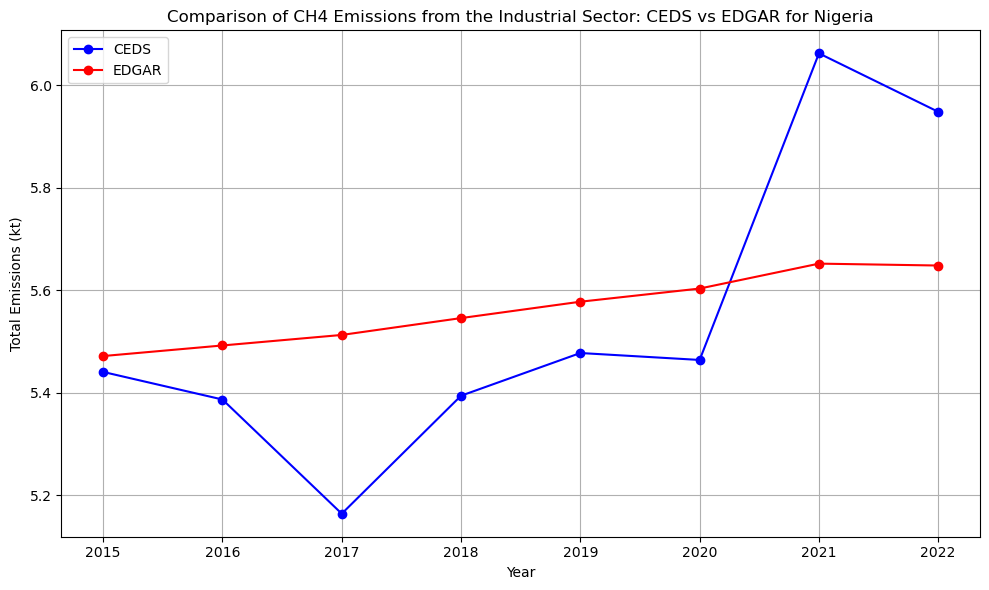

In [11]:
# Load the first emission inventory data (CEDS)
ceds_path = 'ceds new.csv'
ceds_df = pd.read_csv(ceds_path)

# Load the second emission inventory data(EDGAR)
edgar_path = 'edgar new.csv'
edgar_df = pd.read_csv(edgar_path)
# Filter the data for Nigeria (Country code: 'NGA')
ceds_df = ceds_df[ceds_df['country'] == 'nga']  
edgar_df = edgar_df[edgar_df['Country_code_A3'] == 'NGA']  

# Define the sector of interest for CEDS and EDGAR
ceds_sectors_of_interest = [
    '1A2a_Ind-Comb-Iron-steel', '1A2b_Ind-Comb-Non-ferrous-metals',
    '1A2c_Ind-Comb-Chemicals', '1A2d_Ind-Comb-Pulp-paper',
    '1A2e_Ind-Comb-Food-tobacco', '1A2f_Ind-Comb-Non-metalic-minerals',
    '1A2g_Ind-Comb-Construction', '1A2g_Ind-Comb-machinery',
    '1A2g_Ind-Comb-mining-quarying', '1A2g_Ind-Comb-other',
    '1A2g_Ind-Comb-textile-leather', '1A2g_Ind-Comb-transpequip',
    '1A2g_Ind-Comb-wood-products', '2A1_Cement-production',
    '2A2_Lime-production', '2Ax_Other-minerals', '2B_Chemical-industry',
    '2B2_Chemicals-Nitric-acid', '2B3_Chemicals-Adipic-acid',
    '2C_Metal-production', '2H_Pulp-and-paper-food-beverage-wood',
    '2L_Other-process-emissions'
]
edgar_sectors_of_interest = [
    '1.A.2',
    '2.A.1',
    '2.A.2',
    '2.A.3',
    '2.H',
    '2.A.4',
    '2.B',
    '2.C'
]

# Filter the rows for CEDS and EDGAR
filtered_ceds_df = ceds_df[ceds_df['sector'].isin(ceds_sectors_of_interest)]

filtered_edgar_df = edgar_df[edgar_df['ipcc_code_2006_for_standard_report'].isin(edgar_sectors_of_interest)]

# Select only the years OF interest(2015-2022) for CEDS
years = [str(year) for year in range(2015, 2023)]
filtered_ceds_years = filtered_ceds_df[['sector'] + years]

# Select only the years of interest(2015-2022) for EDGAR
years = [str(year) for year in range(2015, 2023)]
filtered_edgar_years = filtered_edgar_df[['ipcc_code_2006_for_standard_report'] + years]

# Sum across all rows for each sector in CEDS
ceds_sector_sums = filtered_ceds_years.groupby('sector').sum()
ceds_total_sum = ceds_sector_sums.sum(axis=0)

# Do the same for EDGAR
edgar_sector_sums = filtered_edgar_years.groupby('ipcc_code_2006_for_standard_report').sum()
edgar_total_sum = edgar_sector_sums.sum(axis=0)

# Combine the total sums into a single DataFrame for plotting
combined_df = pd.DataFrame({
    'Year': years,
    'CEDS': ceds_total_sum.values,
    'EDGAR': edgar_total_sum.values
})
# Combine the total sums into a single DataFrame
#combined_df = pd.concat([ceds_total_sum, edgar_total_sum,years],axis=1)
#combined_df.columns = ['CEDS', 'EDGAR','Year']

# Plot the results in the same graph
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['CEDS'], label='CEDS', marker='o', color='blue')
plt.plot(combined_df['Year'], combined_df['EDGAR'], label='EDGAR', marker='o', color='red')
plt.title('Comparison of CH4 Emissions from the Industrial Sector: CEDS vs EDGAR for Nigeria')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


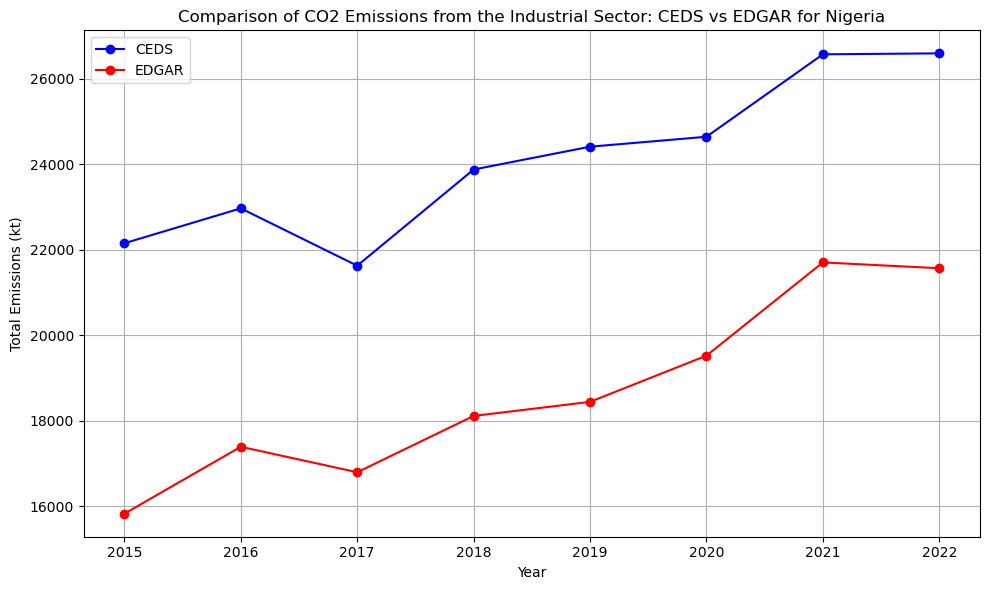

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first emission inventory data(CEDS)
ceds_path = 'ceds new 1.csv'
ceds_df = pd.read_csv(ceds_path)

# Load the second emission inventory data (EDGAR)
edgar_path = 'edgar new 1.csv'
edgar_df = pd.read_csv(edgar_path)
# Filter the data for Nigeria (Country code: 'NGA')
ceds_df = ceds_df[ceds_df['country'] == 'nga']  
edgar_df = edgar_df[edgar_df['Country_code_A3'] == 'NGA']  

# Define the sector of interest for CEDS and EDGAR
ceds_sectors_of_interest = [
    '1A2a_Ind-Comb-Iron-steel', '1A2b_Ind-Comb-Non-ferrous-metals',
    '1A2c_Ind-Comb-Chemicals', '1A2d_Ind-Comb-Pulp-paper',
    '1A2e_Ind-Comb-Food-tobacco', '1A2f_Ind-Comb-Non-metalic-minerals',
    '1A2g_Ind-Comb-Construction', '1A2g_Ind-Comb-machinery',
    '1A2g_Ind-Comb-mining-quarying', '1A2g_Ind-Comb-other',
    '1A2g_Ind-Comb-textile-leather', '1A2g_Ind-Comb-transpequip',
    '1A2g_Ind-Comb-wood-products', '2A1_Cement-production',
    '2A2_Lime-production', '2Ax_Other-minerals', '2B_Chemical-industry',
    '2B2_Chemicals-Nitric-acid', '2B3_Chemicals-Adipic-acid',
    '2C_Metal-production', '2H_Pulp-and-paper-food-beverage-wood',
    '2L_Other-process-emissions'
]

edgar_sectors_of_interest = [
    '1.A.2',
    '2.A.1',
    '2.A.2',
    '2.A.3',
    '2.H',
    '2.A.4',
    '2.B',
    '2.C'
]
# Filter the rows for CEDS and EDGAR
filtered_ceds_df = ceds_df[ceds_df['sector'].isin(ceds_sectors_of_interest)]
filtered_edgar_df = edgar_df[edgar_df['ipcc_code_2006_for_standard_report'].isin(edgar_sectors_of_interest)]


# Select only the years 2015-2020 for CEDS and EDGAR
years = [str(year) for year in range(2015, 2023)]
filtered_ceds_years = filtered_ceds_df[['sector'] + years]
years = [str(year) for year in range(2015, 2023)]
filtered_edgar_years = filtered_edgar_df[['ipcc_code_2006_for_standard_report'] + years]

# Sum across all rows for each sector in CEDS
ceds_sector_sums = filtered_ceds_years.groupby('sector').sum()
ceds_total_sum = ceds_sector_sums.sum(axis=0)

# Do the same for EDGAR
edgar_sector_sums = filtered_edgar_years.groupby('ipcc_code_2006_for_standard_report').sum()
edgar_total_sum = edgar_sector_sums.sum(axis=0)

# Combine the total sums into a single DataFrame for plotting
combined_df = pd.DataFrame({
    'Year': years,
    'CEDS': ceds_total_sum.values,
    'EDGAR': edgar_total_sum.values
})
# Combine the total sums into a single DataFrame
#combined_df = pd.concat([ceds_total_sum, edgar_total_sum,years],axis=1)
#combined_df.columns = ['CEDS', 'EDGAR','Year']

# Plot the results in the same graph
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['CEDS'], label='CEDS', marker='o', color='blue')
plt.plot(combined_df['Year'], combined_df['EDGAR'], label='EDGAR', marker='o', color='red')
plt.title('Comparison of CO2 Emissions from the Industrial Sector: CEDS vs EDGAR for Nigeria')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### The main focus of my work is not to compare the two emission inventories, although this has been supported by some research and findings. I found that the CEDS approach accurately accounts for Nigeria when compared with the Nigeria National Inventory Report (2000–2017).
### The aim is to validate the scientific claim that there was a decrease in emissions during the COVID-19 lockdown and a tremendous increase afterward due to the resumption of continuous activities following the lockdown.

### From the plot, we can see that CO2 did not follow the expected trend and saying  by the CEO of IQAir Frank Hammes, "The year 2020 brought an unexpected dip in air pollution".### This might be due to emissions suspended in the atmosphere or other factors we cannot currently determine.